In [31]:
import os
import numpy as np
import pandas as pd
import sklearn as sk

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Where we're working out of
PROJECT_ROOT_DIR = "."
FOLDER_ID = "building_lab"
DATA_FOLDER = "Denver Airport Building Models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", FOLDER_ID)
#A function to save figures easily
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [32]:
def load_tmy3_data(climate_data, data_path=DATA_FOLDER):
    csv_path = os.path.join(data_path, climate_data)
    return pd.read_csv(csv_path,skiprows=[0], parse_dates=True)

def load_building_data(building_data, data_path=DATA_FOLDER):
    csv_path = os.path.join(data_path, building_data)
    return pd.read_csv(csv_path)


In [33]:
tmy3_data = load_tmy3_data("CO-Denver_Intl_Airport.tmy3")

In [34]:
tmy3_data.head(15)

,Date (MM/DD/YYYY),Time (HH:MM),ETR (W/m^2),ETRN (W/m^2),GHI (W/m^2),GHI source,GHI uncert (%),DNI (W/m^2),DNI source,DNI uncert (%),...,Alb (unitless),Alb source,Alb uncert (code),Lprecip depth (mm),Lprecip quantity (hr),Lprecip source,Lprecip uncert (code),PresWth (METAR code),PresWth source,PresWth uncert (code)
0,01/01/1995,01:00,0,0,0,1,0,0,1,0,...,0.22,F,8,0,1,D,9,0,C,8
1,01/01/1995,02:00,0,0,0,1,0,0,1,0,...,0.22,F,8,0,1,D,9,0,C,8
2,01/01/1995,03:00,0,0,0,1,0,0,1,0,...,0.22,F,8,0,1,D,9,0,C,8
3,01/01/1995,04:00,0,0,0,1,0,0,1,0,...,0.22,F,8,0,1,D,9,0,C,8
4,01/01/1995,05:00,0,0,0,1,0,0,1,0,...,0.22,F,8,0,1,D,9,0,C,8
5,01/01/1995,06:00,0,0,0,1,0,0,1,0,...,0.22,F,8,0,1,D,9,0,C,8
6,01/01/1995,07:00,0,0,0,1,0,0,1,0,...,0.22,F,8,0,1,D,9,0,C,8
7,01/01/1995,08:00,45,908,9,1,17,17,1,21,...,0.22,F,8,0,1,D,9,0,C,8
8,01/01/1995,09:00,248,1415,89,1,17,73,1,21,...,0.22,F,8,0,1,D,9,0,C,8
9,01/01/1995,10:00,433,1415,266,1,17,494,1,21,...,0.22,F,8,0,1,D,9,0,C,8


In [35]:
#Strips the year out of the first column
tmy3_data.iloc[:,0] = tmy3_data.iloc[:,0].str.slice(0,5)

#Important categories
tmy3_data = tmy3_data.iloc[:,[0,1,31,37,40,43,46]]

#Rename columns
tmy3_data = tmy3_data.rename(columns={'Date (MM/DD/YYYY)':'date', 'Time (HH:MM)':'time',
                           'Dry-bulb (C)': 'temp', 'RHum (%)':'humidity',
                          'Pressure (mbar)': 'pressure', 'Wdir (degrees)': 'wind_dir',
                          'Wspd (m/s)':'wind_speed'})

In [36]:
tmy3_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 7 columns):
date          8760 non-null object
time          8760 non-null object
temp          8760 non-null float64
humidity      8760 non-null int64
pressure      8760 non-null int64
wind_dir      8760 non-null int64
wind_speed    8760 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 479.1+ KB


/home/tyler/anaconda3/envs/pip2018ml/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Denver's scatter matrix for Stand-alone Retail
RMSE for Stand-alone Retail is :  0.9298443272237578
_________________________________________
Denver's scatter matrix for Medium Office
RMSE for Medium Office is :  2.0356819581257666
_________________________________________
Denver's scatter matrix for Warehouse
RMSE for Warehouse is :  0.3919209960274535
_________________________________________
Denver's scatter matrix for Small Hotel
RMSE for Small Hotel is :  0.4741134490406529
_________________________________________


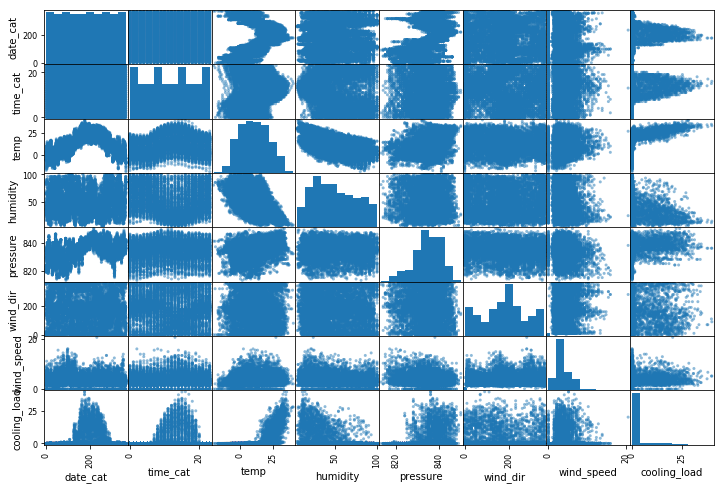

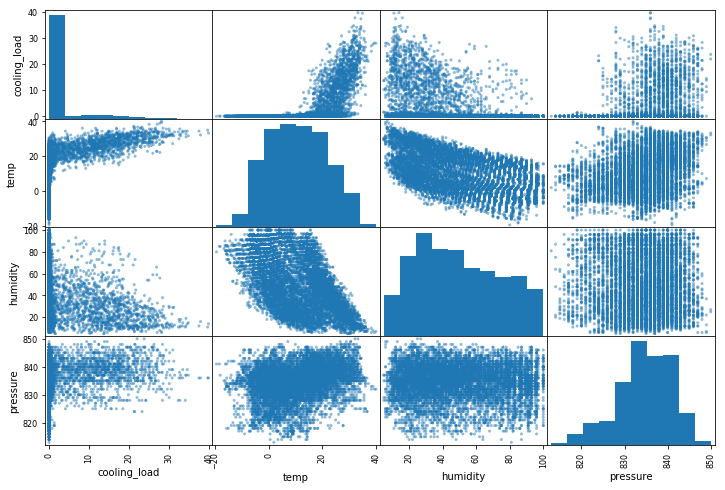

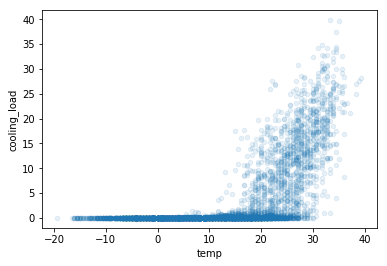

In [ ]:
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


# City size.
city_descriptors = [5, 5, 3, 2]
num_med_off = 5
num_small_hotel = 2
num_stand_alone = 5
num_warehouse = 3

# Model's feature.
attributes = ['cooling_load', 'temp', 'humidity', 'pressure']

# Study the buildings.
build_energy_data_list = []
rmse_results = []
models = []
test_sets = []

csvs_list = ["RefBldgStand-aloneRetailNew2004_v1.3_7.1_5B_USA_CO_BOULDER.csv",
             "RefBldgMediumOfficeNew2004_v1.3_7.1_5B_USA_CO_BOULDER.csv",
             "RefBldgWarehouseNew2004_v1.3_7.1_5B_USA_CO_BOULDER.csv",
             "RefBldgSmallHotelNew2004_v1.3_7.1_5B_USA_CO_BOULDER.csv"]

city_buildings = ["Stand-alone Retail", "Medium Office", "Warehouse", "Small Hotel"]

for csv_file, building in zip(csvs_list, city_buildings):
    building_energy_data = load_building_data(csv_file)
    # Store the energy data.
    build_energy_data_list.append(building_energy_data)
    #The combined cooling energy with matching date and time from the feature set
    combined_set = pd.DataFrame(tmy3_data)
    combined_set = combined_set.join(building_energy_data.iloc[:,3])
    combined_set = combined_set.rename(columns={'Cooling:Electricity [kW](Hourly)':'cooling_load'})
    #Clean data.
    date_cat = combined_set['date']
    date_cat_encoded, date_categories = date_cat.factorize()
    time_cat = combined_set['time']
    time_cat_encoded, time_categories = time_cat.factorize()
    #
    combined_set = pd.DataFrame({'date_cat':date_cat_encoded,'time_cat':time_cat_encoded})
    combined_set = pd.concat([combined_set,tmy3_data.iloc[:,2:7],building_energy_data.iloc[:,3]],axis=1)
    combined_set = combined_set.rename(columns={'Cooling:Electricity [kW](Hourly)':'cooling_load'})
    
    # Inspect the data.
    # Scatter matrix
    print("Denver's scatter matrix for " + building)
    scatter_matrix(combined_set, figsize = (12,8))
    # Attributes scatte matrix
    scatter_matrix(combined_set[attributes], figsize = (12,8))
    corr_matrix = combined_set.corr()
    corr_matrix["cooling_load"]
    
    # Train.
    train_set, test_set = train_test_split(combined_set, test_size=0.2, random_state=42)
    # Keep train set safe.
    train_set_safe = train_set.copy()
    # Correlation data.
    corr_matrix = train_set.corr()
    corr_matrix["cooling_load"]
    # PLot.
    train_set.plot(kind='scatter', x = 'temp', y = 'cooling_load', alpha = 0.1)
    # Scaling train set.
    feature_set_train = train_set.drop('cooling_load', axis =1)
    label_set_train = train_set['cooling_load'].copy()
    std_scaler = StandardScaler()
    scaled_feature_set_train = std_scaler.fit_transform(feature_set_train)
    
    #****************** Regression **********************#
    # Use linear regression : Fitting.
    #lin_reg = LinearRegression()
    #lin_reg.fit(scaled_feature_set_train, label_set_train)
    # Store my current model (for some building).
    #models.append(lin_reg)
     
    # Use decision tree.    
    #tree_reg = DecisionTreeRegressor(random_state = 42)
    ##tree_reg.fit(feature_set_train, label_set_train)
    ##tree_reg.fit(min_max_feature_set_train, label_set_train)
    #tree_reg.fit(scaled_feature_set_train, label_set_train)
    #models.append(tree_reg)
    
    # Use random forest.
    forest_reg = RandomForestRegressor(random_state = 42)
    forest_reg.fit(scaled_feature_set_train, label_set_train)
    models.append(forest_reg)
    #**********************************************************#
    # Scale test set.
    feature_set_test = test_set.drop('cooling_load', axis =1)
    label_set_test = test_set['cooling_load'].copy()
    # You should not fit test data!!!
    scaled_feature_set_test = std_scaler.transform(feature_set_test)
    test_sets.append(scaled_feature_set_test)
    
    #****************************************#
    # Results.
    
    #lin_energy_predictions = lin_reg.predict(feature_set_train)
    #lin_mse = mean_squared_error(label_set_train, lin_energy_predictions)
    #lin_rmse = np.sqrt(lin_mse)
    
    #tree_energy_predictions = tree_reg.predict(feature_set_train)
    #tree_mse = mean_squared_error(label_set_train, tree_energy_predictions)
    #tree_rmse = np.sqrt(tree_mse)
    
    forest_energy_predictions = forest_reg.predict(scaled_feature_set_train)
    forest_mse = mean_squared_error(label_set_train, forest_energy_predictions)
    forest_rmse = np.sqrt(forest_mse)
    #****************************************#
    
    # Store rmse.
    #rmse_results.append(lin_rmse)
    #rmse_results.append(tree_rmse)
    rmse_results.append(forest_rmse)
    
    
    print("RMSE for " + building + " is : ", forest_rmse)
    
    # Linear regression Version : Make the plot.
    #plt.clf()
    #plt.plot(feature_set_train["temp"], label_set_train, 'o', color='grey', label = 'Actual Output')
    #plt.plot(feature_set_train["temp"], lin_energy_predictions, 'o', color='red', label = 'Predicted Output')
    #plt.xlabel("temperature")
    #plt.ylabel("Energy")
    #plt.title("Linear Regression - Training Set")
    #plt.legend()
    #plt.savefig("linear_regression_train_set.png")
    
    # Decision Tree Version : Make the plot.
    #plt.clf()
    #plt.plot(feature_set_train["humidity"], label_set_train, 'o', color='grey', label = 'Actual Output')
    #plt.plot(feature_set_train["humidity"], tree_energy_predictions, 'o', color='red', label = 'Predicted Output')
    #plt.xlabel("Humidity")
    #plt.ylabel("Enegy")
    #plt.title("Decision Tree Regression - Training Set")
    #plt.legend()
    #plt.ylim((-1, 120))
    #lt.xlim((-1,120))
    #plt.savefig("decision_tree_regression_train_set.png")

    print("_________________________________________")
    

In [ ]:
# Results combination.
index = 0
energy_total = []

for num_of_buildings in city_descriptors:
    model = models[index]
    test_set = test_sets[index]
    # fix me
    energy_total.append(num_of_buildings * model.predict(test_set))
    index += 1
    
for i in range(0, len(test_set)-1, 1):
    energy_for_ith = 0
    for j in range(0, len(city_descriptors)-1, 1):
        energy_for_ith += energy_total[j][i]
    print("Energy for " , i, " is :", energy_for_ith)

In [ ]:
# City results,